In [3]:
from google.colab import files
uploaded = files.upload()

Saving item_listing_category.zip to item_listing_category.zip


In [4]:
import pandas as pd
import zipfile

# Specify the path to the ZIP file in your Jupyter environment
zip_file_path = 'item_listing_category.zip'

# Extract the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  # You can change the folder name as needed

# Specify the correct path to the extracted CSV file
csv_file_path = 'extracted_data/item_listing_category.csv'  # Use the actual CSV filename

# Read the CSV data into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the 'df' DataFrame as needed

In [5]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...


**Question 1.1**  

Find the missing values:  
• Write the function missing_values_table and use the dataframe as the input. The function should return the information of missing values by column (only for columns which have missing values and the returned value should be the count of rows has missing values);  
• For columns which have missing values, could you impute the missing values with the mean value of the particular columns? (if you think it could not be done with mean value, write down the reason in comments and report rather than code)

In [6]:
def missing_values_table(df):
    # Calculate the total number of missing values in each column
    missing_values = df.isnull().sum()

    # Create a DataFrame to store the missing value information
    missing_table = pd.DataFrame({'Missing Values': missing_values})

    # Filter the columns with missing values (count > 0)
    missing_table = missing_table[missing_table['Missing Values'] > 0]

    return missing_table

# Using df as input in the function
missing_table = missing_values_table(df)
print(missing_table)

                   Missing Values
category_name                1539
brand_name                 151956
clean_description             194


**Question 1.2**  

Find the price information from the data:  
• Write code to print the median price of the items in the data;  
• What is the 90th percentile value on the price;  
• Draw the histogram chart for the price of the items in the data with 50 bins  

In [7]:
print('Median Price:', df['price'].median())

Median Price: 17.0


In [8]:
import numpy as np

# Calculate the 90th percentile of the "price" column
percentile_90 = np.percentile(df['price'].dropna(), 90)
print(percentile_90)

51.0


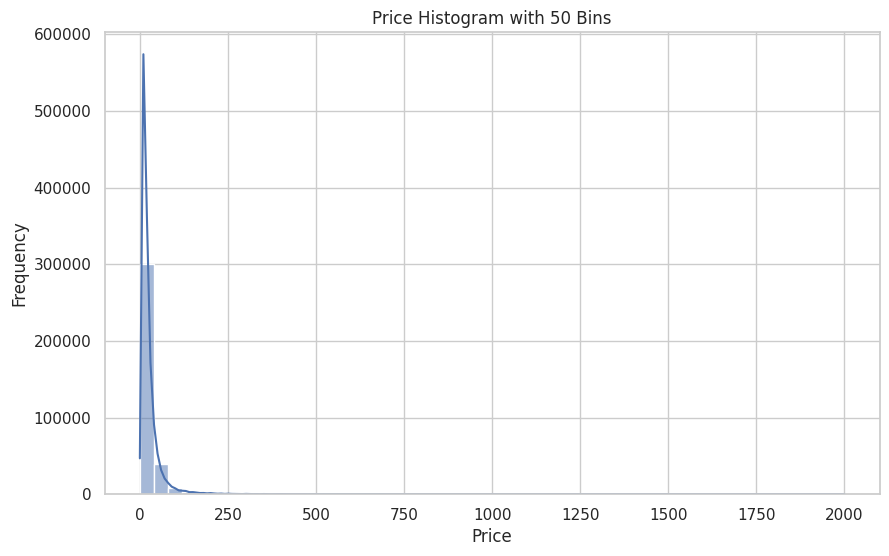

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Plot a histogram for the "price" column with 50 bins
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram with 50 Bins')
plt.show()

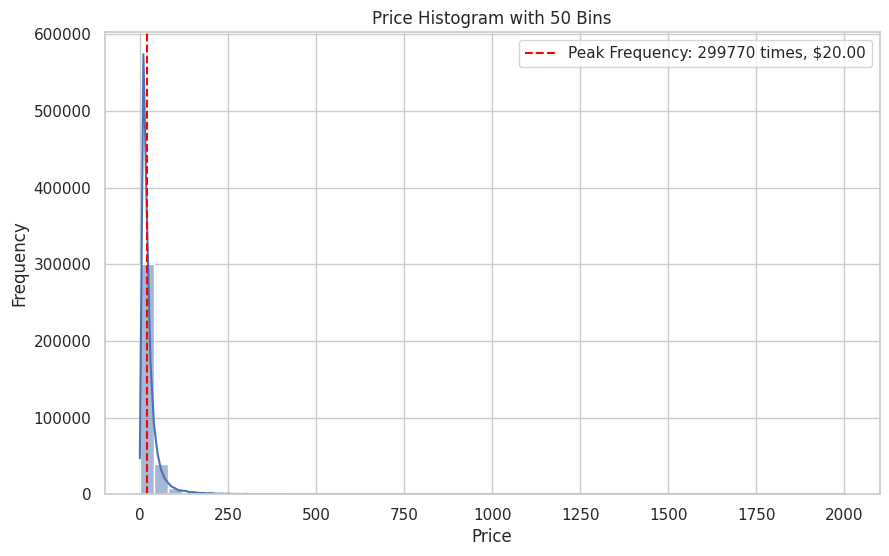

In [20]:
# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Plot a histogram for the "price" column with 50 bins
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram with 50 Bins')

# Find the bin with the highest frequency
hist, bin_edges = np.histogram(df['price'], bins=50)
peak_bin_index = np.argmax(hist)
peak_bin_value = (bin_edges[peak_bin_index] + bin_edges[peak_bin_index + 1]) / 2
peak_frequency = hist[peak_bin_index]

# Add a vertical line at the peak frequency
plt.axvline(x=peak_bin_value, color='red', linestyle='--', label=f'Peak Frequency: {peak_frequency} times, ${peak_bin_value:.2f}')
plt.legend()

plt.show()

**Question 1.3**  

Exploring the shipping information from the data:  
• Write code to find out the percentage of the items that are paid by the buyers.  
• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).  
• When buying the items online, do you need to pay higher price if seller pays for theshipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).  
(Optional: You could use the subplot from EDA)

In [21]:
# Calculate the total number of items
total_items = len(df)

# Calculate the number of items paid by buyers (where price is greater than 0)
items_paid_by_buyers = len(df[df['price'] > 0])

# Calculate the percentage
percentage_paid_by_buyers = (items_paid_by_buyers / total_items) * 100

# Print the result
print(f"Percentage of items paid by buyers: {percentage_paid_by_buyers:.2f}%")

Percentage of items paid by buyers: 99.95%


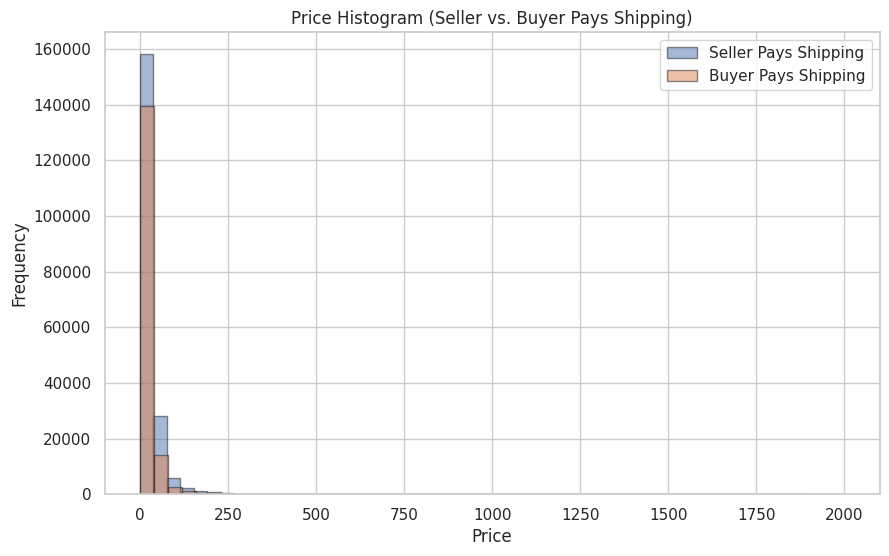

In [22]:
# Filter the DataFrame for seller pays shipping and buyer pays shipping
seller_pays_shipping = df[df['shipping'] == 0]
buyer_pays_shipping = df[df['shipping'] == 1]

# Create a figure and axis for the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for seller pays shipping and buyer pays shipping on the same axes
ax.hist(seller_pays_shipping['price'].dropna(), bins=50, edgecolor='k', alpha=0.5, label='Seller Pays Shipping')
ax.hist(buyer_pays_shipping['price'].dropna(), bins=50, edgecolor='k', alpha=0.5, label='Buyer Pays Shipping')

# Add labels and legend
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram (Seller vs. Buyer Pays Shipping)')
plt.legend()

# Show the plot
plt.show()

In [23]:
# Calculate the median price of items paid by buyers (buyer pays shipping)
median_price_buyer_pays_shipping = df[df['shipping'] == 1]['price'].median()

# Calculate the median price of items paid by sellers (seller pays shipping)
median_price_seller_pays_shipping = df[df['shipping'] == 0]['price'].median()

# Print the results
print(f"Median price of items paid by buyers: ${median_price_buyer_pays_shipping:.2f}")
print(f"Median price of items paid by sellers: ${median_price_seller_pays_shipping:.2f}")

# Compare the medians and explain the result
if median_price_buyer_pays_shipping < median_price_seller_pays_shipping:
    print("Items paid by buyers have a lower median price, indicating that buyers may pay less when the seller pays for shipping.")
elif median_price_buyer_pays_shipping > median_price_seller_pays_shipping:
    print("Items paid by buyers have a higher median price, indicating that buyers may pay more when they have to pay for shipping.")
else:
    print("The median prices are the same for items paid by buyers and sellers.")

Median price of items paid by buyers: $14.00
Median price of items paid by sellers: $19.00
Items paid by buyers have a lower median price, indicating that buyers may pay less when the seller pays for shipping.


**Question 1.4**  

You are required to find out the item condition information from the data. Lower the number
(value), the better condition of the item.  
• Write the code to find out (print) the count of the rows on each number (value) in column
item_condition_id.  
• Draw the boxplot graphs (one plot) on the price for each item condition value, and find out
out whether the better condition of the item could have higher median price (draw the plot
and answer this question in the comment and report).  


In [24]:
# Count the rows for each unique value in the "item_condition_id" column
condition_counts = df['item_condition_id'].value_counts()

# Print the count of rows for each condition
print("Item Condition Counts:")
for condition_id, count in condition_counts.items():
    print(f"Condition {condition_id}: {count} rows")

Item Condition Counts:
Condition 1: 153402 rows
Condition 3: 104248 rows
Condition 2: 89843 rows
Condition 4: 7768 rows
Condition 5: 547 rows


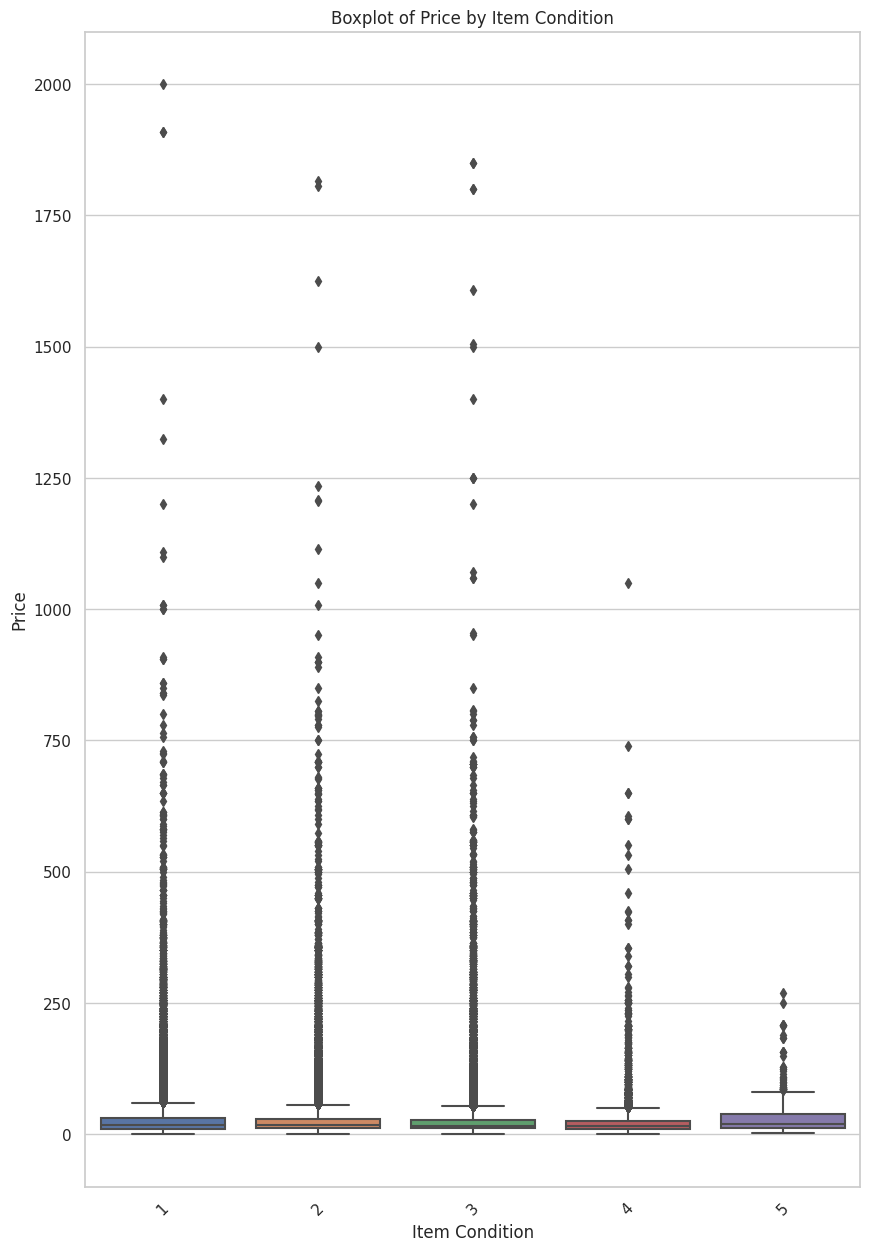

In [25]:
# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Create a boxplot for price vs. item_condition_id
plt.figure(figsize=(10, 15))  # Optional: Adjust the figure size
sns.boxplot(data=df, x='item_condition_id', y='price')
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.title('Boxplot of Price by Item Condition')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility

# Show the plot
plt.show()

**Question 1.5**  

Conduct the category analysis and find out the relevant information:  
• Write the code to find out (print) how many unique categories you could find from column
category_name.  
• For the items with worst condition only (highest value from item_condition_id), write code
to (print) find out the top 3 categories (now you probably understand the findings you had
in Question 1.4).  

In [26]:
df['category_name'].nunique()

1135

In [27]:
# Create a pivot table to count the number of items in each category for the worst condition
pivot_table = pd.pivot_table(df[df['item_condition_id'] == df['item_condition_id'].max()],
                              values='name',
                              index='category_name',
                              aggfunc='count')

# Sort the pivot table by the count of items in descending order
sorted_pivot = pivot_table.sort_values(by='name', ascending=False)

# Get the top 3 categories
top_categories = sorted_pivot.head(3)

# Print the top 3 categories
print("Top 3 Categories for Items with Worst Condition:")
print(top_categories)

Top 3 Categories for Items with Worst Condition:
                                                    name
category_name                                           
Electronics/Cell Phones & Accessories/Cell Phon...   137
Electronics/Video Games & Consoles/Games              42
Electronics/Video Games & Consoles/Consoles           35


**Question 1.6**  
The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and
subcat_2) are concatenated with ’/’ character sequentially in the data now.  
• Write the function (must be function) to split the text content (string value in each row) in
column category_name by ’/’ character. you need to handle the exception in the function
for those has missing values (NaN). For missing values (NaN), the results from splitting
should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.  
• Use the above function you wrote to create three new columns main_cat,subcat_1 and
subcat_2 with corresponding values from the result of splitting. Print out the dataframe to
show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.

In [28]:
def split_category_name(category_name):
    try:
        # Split the category_name by '/' and extract the three parts
        parts = category_name.split('/')
        main_cat = parts[0].strip()
        subcat_1 = parts[1].strip()
        subcat_2 = parts[2].strip()
    except AttributeError:
        # Handle missing values (NaN)
        main_cat = "Category Unknown"
        subcat_1 = "Category Unknown"
        subcat_2 = "Category Unknown"
    except IndexError:
        # Handle cases where there are not enough parts
        main_cat = "Category Unknown"
        subcat_1 = "Category Unknown"
        subcat_2 = "Category Unknown"

    return main_cat, subcat_1, subcat_2

# Apply the function to the 'category_name' column and create new columns
df[['main_cat', 'subcat_1', 'subcat_2']] = df['category_name'].apply(split_category_name).apply(pd.Series)

# Print the first few rows to verify the result
print(df[['category_name', 'main_cat', 'subcat_1', 'subcat_2']].head())

                        category_name main_cat        subcat_1  \
0         Women/Tops & Blouses/Blouse    Women  Tops & Blouses   
1     Women/Tops & Blouses/Tank, Cami    Women  Tops & Blouses   
2  Kids/Toys/Action Figures & Statues     Kids            Toys   
3               Kids/Boys 2T-5T/Shoes     Kids      Boys 2T-5T   
4         Kids/Girls 0-24 Mos/Dresses     Kids  Girls 0-24 Mos   

                   subcat_2  
0                    Blouse  
1                Tank, Cami  
2  Action Figures & Statues  
3                     Shoes  
4                   Dresses  


In [29]:
# Apply the function to the 'category_name' column and create new columns
df[['main_cat', 'subcat_1', 'subcat_2']] = df['category_name'].apply(split_category_name).apply(pd.Series)

# Print the top 5 rows of the new columns
print("Top 5 Rows of main_cat, subcat_1, and subcat_2:")
df.head()

Top 5 Rows of main_cat, subcat_1, and subcat_2:


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,main_cat,subcat_1,subcat_2
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,brand unavailable,16.0,0,max cleo black dress paper crane black tank to...,Women,Tops & Blouses,Blouse
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",brand unavailable,17.0,0,sequin pink sign sequins missing gently worn,Women,Tops & Blouses,"Tank, Cami"
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...,Kids,Toys,Action Figures & Statues
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,Kids,Boys 2T-5T,Shoes
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,Kids,Girls 0-24 Mos,Dresses


**Question 1.7**  
After splitting the category for column category_name, we now have the three main details
regarding to the category information. However, we need to clean the text in each of the new
three columns in lowercase.  
• Write code (or function) to change the text (value in each row) from the new three columns
to lowercase.  
• Draw the bar chart to find out the top 5 most popular main categories (in column main_cat)
in the data (only showing the top 5).  
• Write code (or function) to (print) find out how many unique main categories (in col umn
main_cat), unique first sub-categories (in column subcat_1) and unique second
sub-categories (in column subcat_2) respectively.  

In [30]:
def lowercase_categories(df):
    # Apply lowercase transformation to the specified columns
    df['main_cat'] = df['main_cat'].str.lower()
    df['subcat_1'] = df['subcat_1'].str.lower()
    df['subcat_2'] = df['subcat_2'].str.lower()

# Call the function to convert the categories to lowercase
lowercase_categories(df)

# Print the first few rows to verify the result
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,main_cat,subcat_1,subcat_2
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,brand unavailable,16.0,0,max cleo black dress paper crane black tank to...,women,tops & blouses,blouse
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",brand unavailable,17.0,0,sequin pink sign sequins missing gently worn,women,tops & blouses,"tank, cami"
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...,kids,toys,action figures & statues
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,kids,boys 2t-5t,shoes
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,kids,girls 0-24 mos,dresses


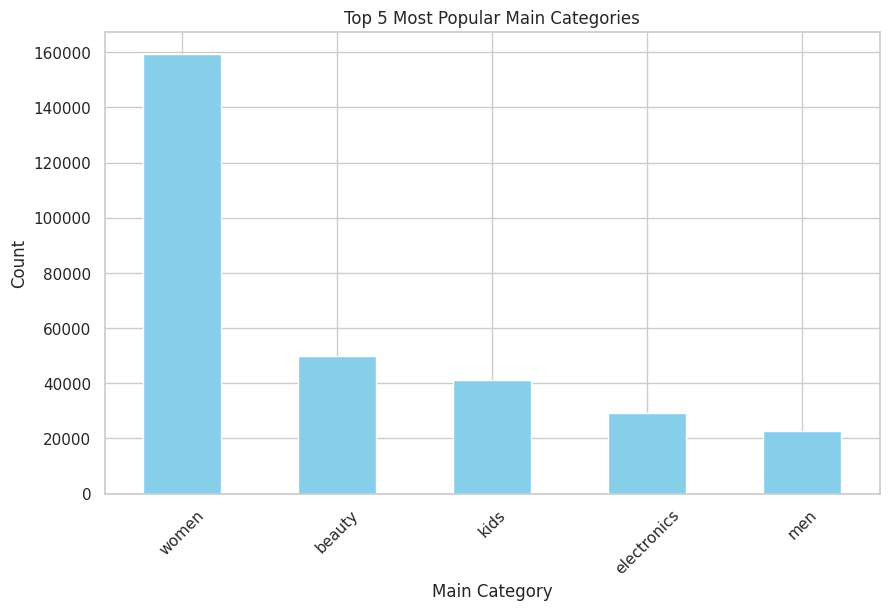

In [31]:
import matplotlib.pyplot as plt

# Calculate the top 5 most popular main categories
top_main_categories = df['main_cat'].value_counts().head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_main_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Popular Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [32]:
# Find the number of unique main categories in the 'main_cat' column
unique_main_categories_count = df['main_cat'].nunique()

# Find the number of unique first sub-categories in the 'subcat_1' column
unique_subcat_1_count = df['subcat_1'].nunique()

# Find the number of unique second sub-categories in the 'subcat_2' column
unique_subcat_2_count = df['subcat_2'].nunique()

# Print the counts
print(f"Number of unique main categories: {unique_main_categories_count}")
print(f"Number of unique first sub-categories: {unique_subcat_1_count}")
print(f"Number of unique second sub-categories: {unique_subcat_2_count}")

Number of unique main categories: 11
Number of unique first sub-categories: 114
Number of unique second sub-categories: 788


**Question 1.8**  
Exploring the price and categories.  
• Write code to (print) find out the median price for all the categories in new column main_cat.  
• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column
subcat_1) in the data.  
• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column
subcat_2) in the data.  

In [33]:
# Group the DataFrame by 'main_cat' and calculate the median price for each category
median_prices_by_main_cat = df.groupby('main_cat')['price'].median()

# Print the median prices for each main category
print("Median Price for Each Main Category:")
print(median_prices_by_main_cat)

Median Price for Each Main Category:
main_cat
beauty                    15.0
category unknown          18.0
electronics               15.0
handmade                  12.0
home                      18.0
kids                      14.0
men                       21.0
other                     14.0
sports & outdoors         16.0
vintage & collectibles    16.0
women                     19.0
Name: price, dtype: float64


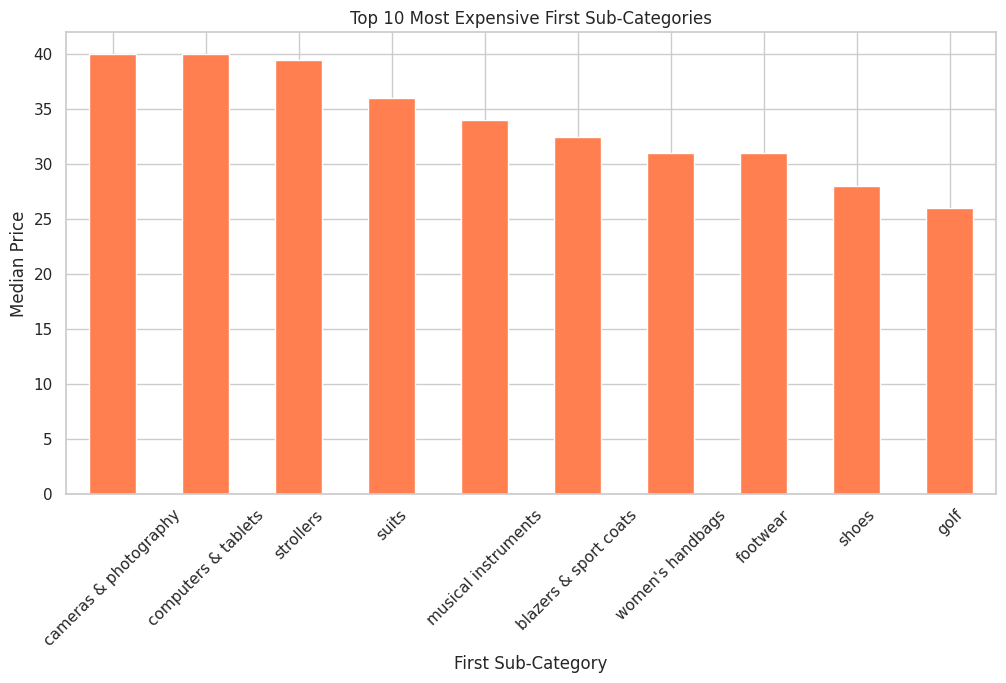

In [34]:
# Calculate the median price for each first sub-category and sort in descending order
top_10_expensive_subcat_1 = df.groupby('subcat_1')['price'].median().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_expensive_subcat_1.plot(kind='bar', color='coral')
plt.title('Top 10 Most Expensive First Sub-Categories')
plt.xlabel('First Sub-Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

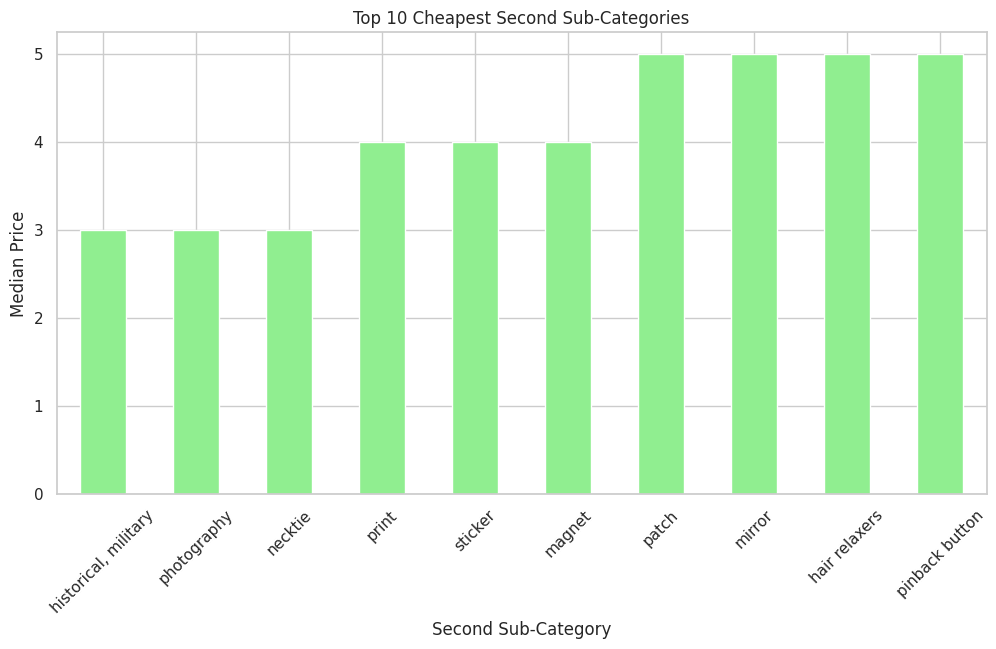

In [35]:
# Calculate the median price for each second sub-category and sort in ascending order
top_10_cheapest_subcat_2 = df.groupby('subcat_2')['price'].median().sort_values().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_cheapest_subcat_2.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cheapest Second Sub-Categories')
plt.xlabel('Second Sub-Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

**Question 1.9**  
Exploring the price and brand.  
• Write code to (print) find out the median price for all the brands (fill NaN with ’brand
unavailable’).  
• Draw the bar chart to find out the top 10 most popular brands in the data.

In [36]:
# Fill missing values in the 'brand_name' column with 'brand unavailable'
df['brand_name'].fillna('brand unavailable', inplace=True)

# Group the DataFrame by 'brand_name' and calculate the median price for each brand
median_prices_by_brand = df.groupby('brand_name')['price'].median()

# Print the median prices for each brand
print("Median Price for Each Brand:")
print(median_prices_by_brand)

Median Price for Each Brand:
brand_name
% Pure               14.0
10.Deep              18.0
21men                10.0
3.1 Phillip Lim     232.5
3M®                  15.0
                    ...  
timi & leslie        65.0
tokidoki             18.0
totes ISOTONER       14.0
triangl swimwear     44.0
vineyard vines       21.0
Name: price, Length: 3047, dtype: float64


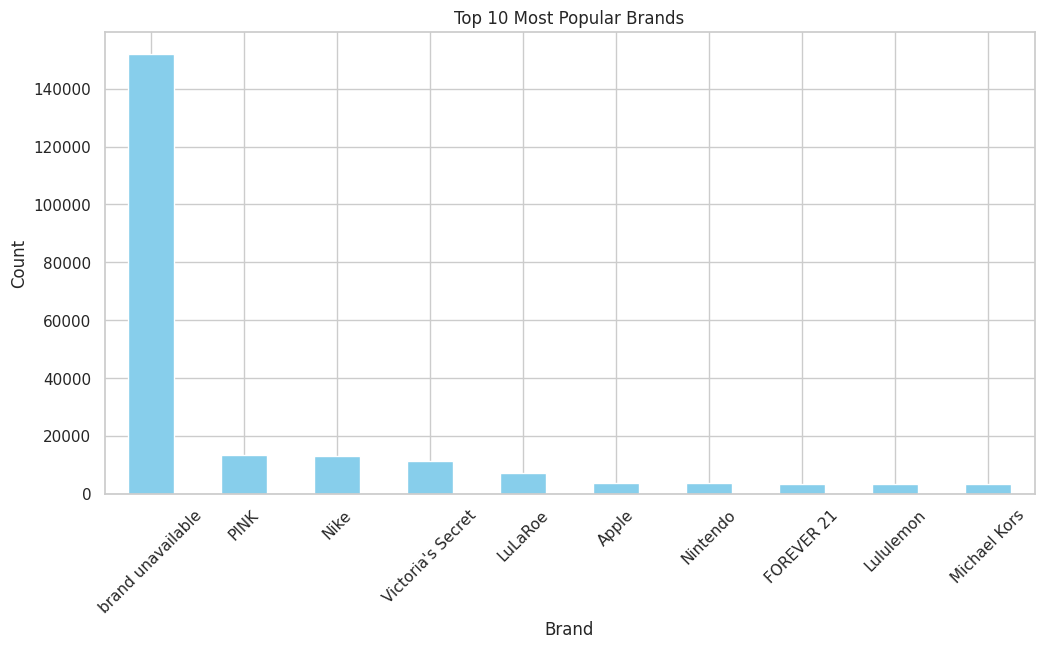

In [37]:
# Calculate the top 10 most popular brands by counting occurrences
top_10_popular_brands = df['brand_name'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_popular_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

**Question 1.10**  
Item Description Analysis.  
• Could you draw the wordcloud chart by using the column clean_description.  
• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec
ond/third/fourth quantile).  
• Draw the wordcould by using the column clean_description on each quantile of price data.

In [38]:
# To install word clouduse below code
# pip install wordcloud

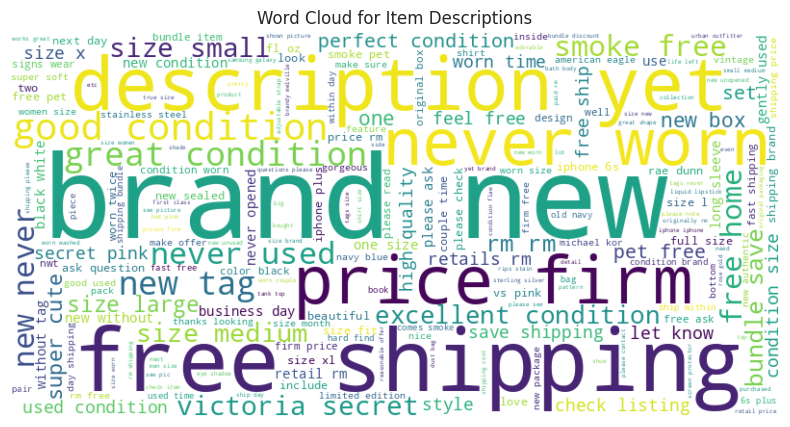

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = ' '.join(df['clean_description'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Create a plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Item Descriptions')
plt.show()

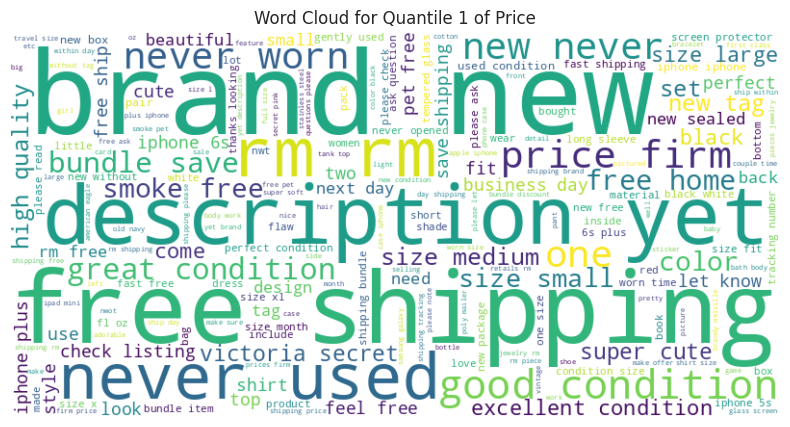

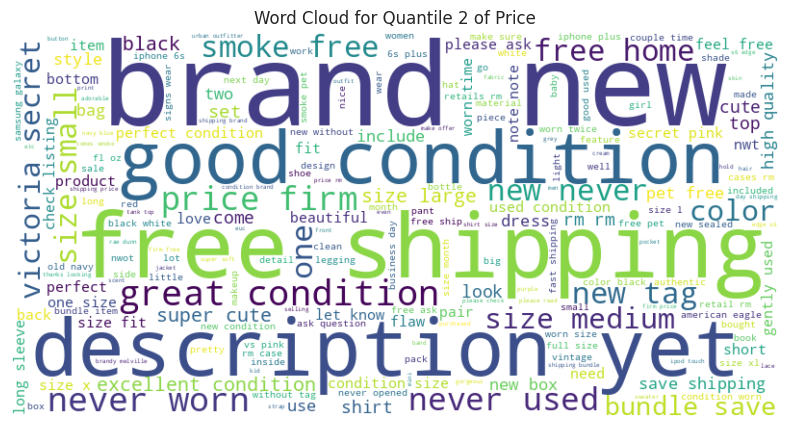

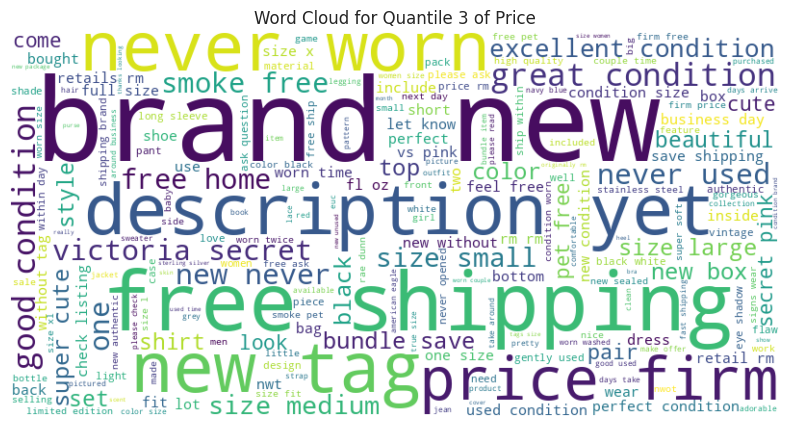

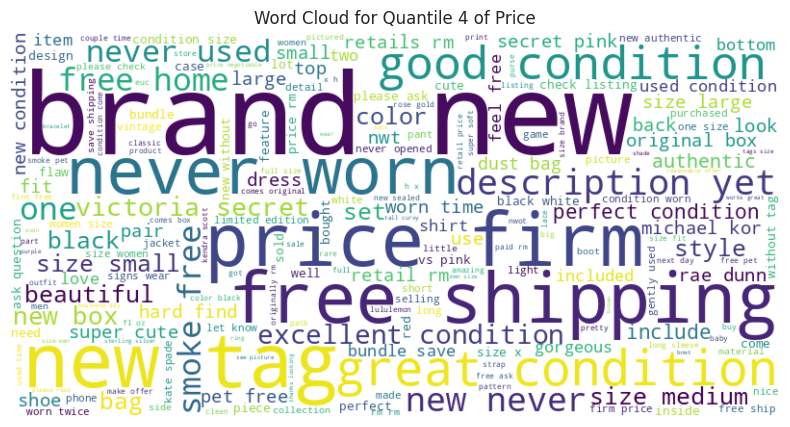

In [40]:
# Define the number of quantiles you want (e.g., 4 for quartiles)
num_quantiles = 4

# Split the data into quantiles based on price
quantiles = pd.qcut(df['price'], num_quantiles, labels=False)

# Create a separate word cloud for each quantile
for i in range(num_quantiles):
    # Filter the data for the current quantile
    quantile_data = df[quantiles == i]

    # Combine descriptions into a single string
    text = ' '.join(quantile_data['clean_description'].astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Create a plot for the current quantile
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Quantile {i+1} of Price')

    # Show the plot for the current quantile
    plt.show()